In [2]:
import networkx as nx
from utils import print_graph
import matplotlib.pyplot as plt
import numpy as np

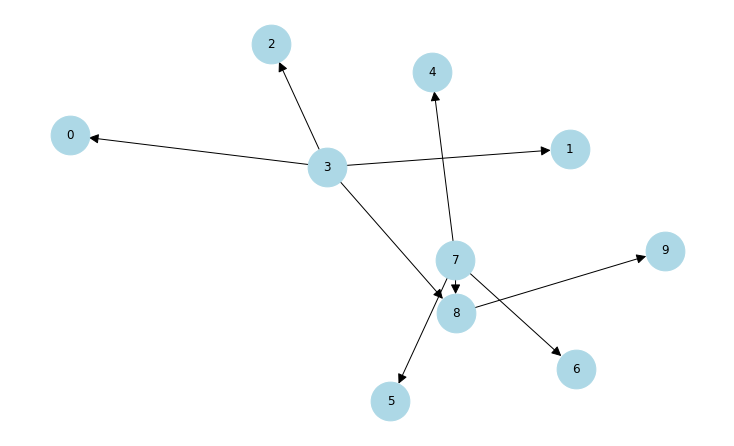

In [4]:
G = nx.DiGraph()
edges = [(7, 4), (3, 8), (3, 2), (3, 0), (3, 1), (7, 5), (7, 6), (7, 8), (8, 9)]
G.add_edges_from(edges)

plt.figure(figsize=(10,6))
pos = nx.spring_layout(G, scale=20, k=3/np.sqrt(G.order()))
nx.draw(G, pos, node_color='lightblue',
        with_labels=True,
        node_size=1500,
        arrowsize=20)

In [17]:
H = nx.to_undirected(G)
nodelist = [0,4,6,7,9]
paths = []
for i in range(len(nodelist)-1):
        if len(nodelist) == 1:
                paths.append(i)
        paths.append((nodelist[0], nodelist[i+1]))
print(paths)

[(0, 4), (0, 6), (0, 7), (0, 9)]


In [21]:
subgraph_nodes = nx.Graph()
nodes_in_subgraph = []
for path in paths:
        if path[0] in nodes_in_subgraph or path[1] in nodes_in_subgraph:
                continue
        longest_induced_path = nx.shortest_path(H, *path)
        nodes_in_subgraph.append(longest_induced_path)
        subgraph_nodes.add_nodes_from(longest_induced_path)
print_graph(subgraph_nodes)
print(nodes_in_subgraph)

List of nodes: 
	 0 {}
	 3 {}
	 8 {}
	 7 {}
	 4 {}
	 6 {}
	 9 {}

List of edges: 
[[0, 3, 8, 7, 4], [0, 3, 8, 7, 6], [0, 3, 8, 7], [0, 3, 8, 9]]


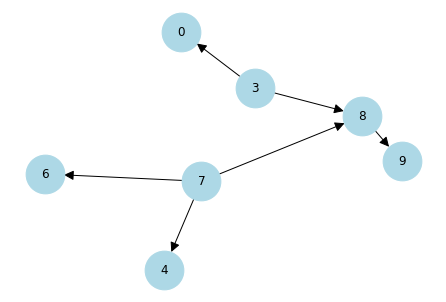

In [23]:
subgraph = nx.subgraph(G, subgraph_nodes)
pos = nx.spring_layout(subgraph, scale=20, k=3/np.sqrt(G.order()))
nx.draw(subgraph, pos, node_color='lightblue',
        with_labels=True,
        node_size=1500,
        arrowsize=20)

In [24]:
print_graph(subgraph)

List of nodes: 
	 7 {}
	 4 {}
	 3 {}
	 8 {}
	 0 {}
	 6 {}
	 9 {}

List of edges: 
	7->4 {}
	7->6 {}
	7->8 {}
	3->8 {}
	3->0 {}
	8->9 {}
